✓ Data loaded successfully!
  Shape: (148, 7)
  Columns: ['name', 'online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'listed_in(type)']


🚀 Starting Complete Zomato Data Analysis

Cleaning data...
✓ Data cleaned!
  Removed 0 duplicate rows
  Missing values:
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

DATA EXPLORATION

First 5 rows:
                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type) 

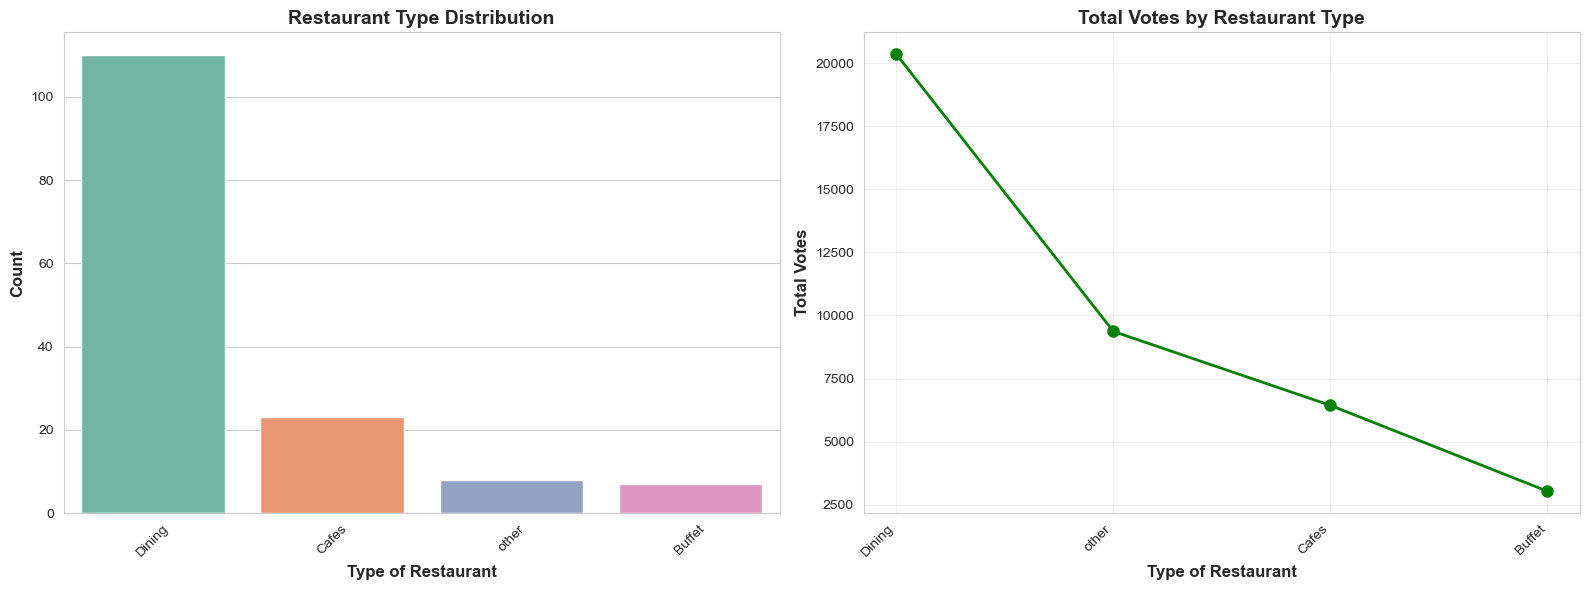

✓ Saved: restaurant_types_analysis.png

Finding top 10 restaurants by votes...

Top Restaurants by Votes:
              name  votes  rate listed_in(type)
 Empire Restaurant   4884   4.4           other
     Meghana Foods   4401   4.4          Dining
            Onesta   2556   4.6           Cafes
            Onesta   2556   4.6           other
       Kabab Magic   1720   4.1          Dining
   Szechuan Dragon   1647   4.2          Dining
      Roving Feast   1047   4.0          Dining
   San Churro Cafe    918   3.8          Buffet
   San Churro Cafe    918   3.8           Cafes
Gustoes Beer House    868   4.1          Dining


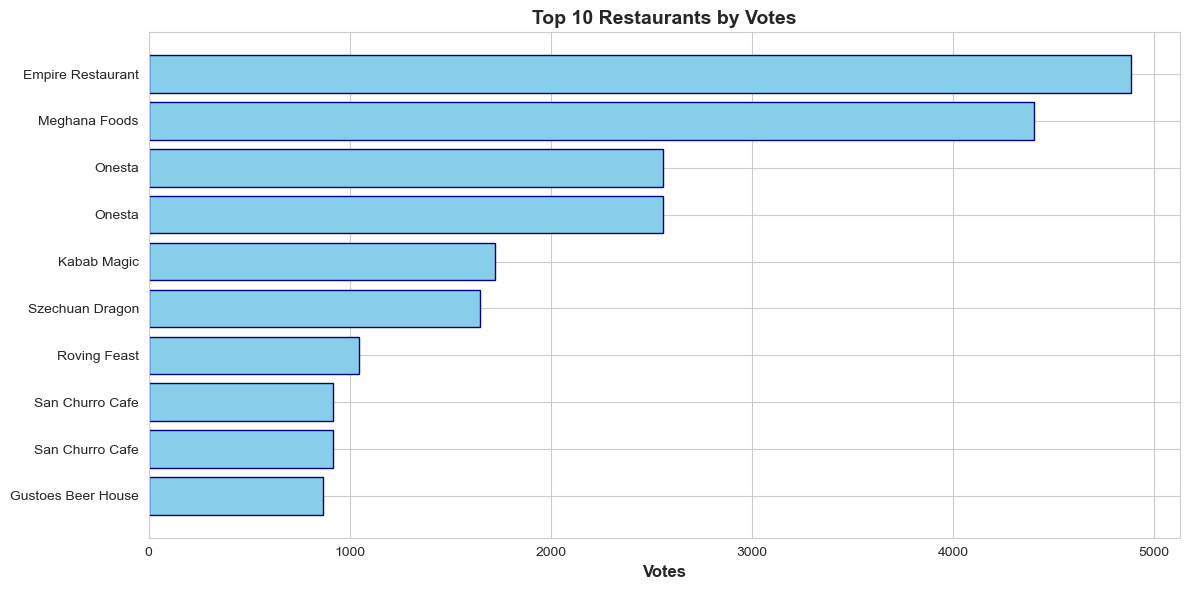

✓ Saved: top_restaurants.png

Analyzing online order patterns...


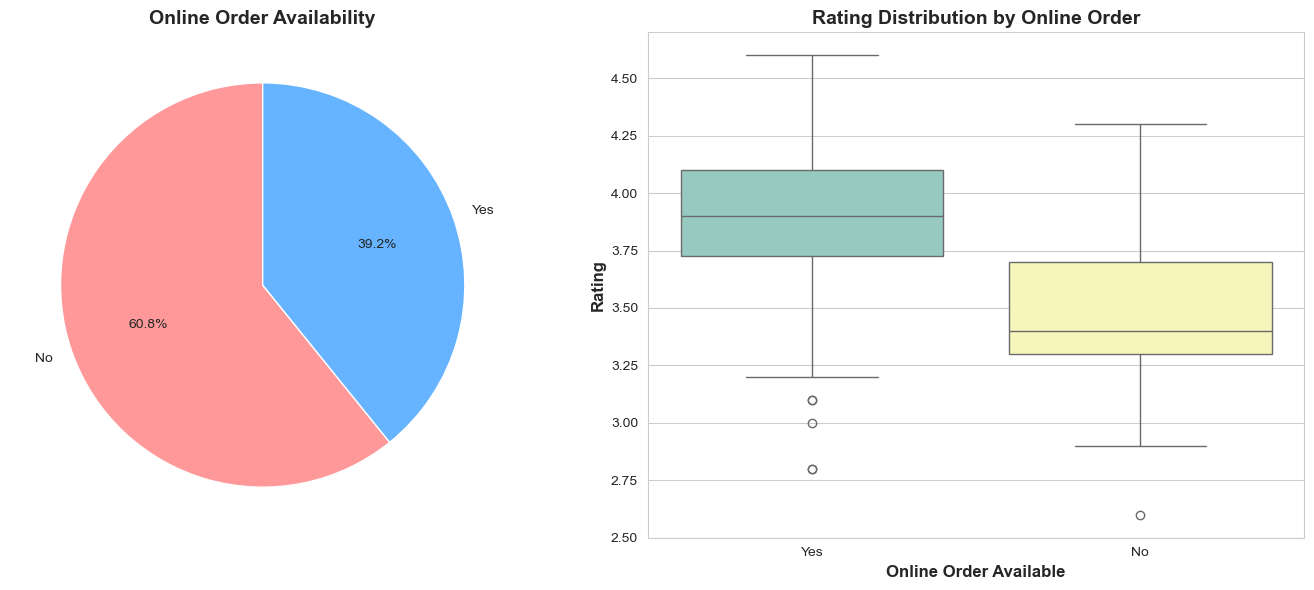

✓ Saved: online_order_analysis.png

Analyzing ratings distribution...


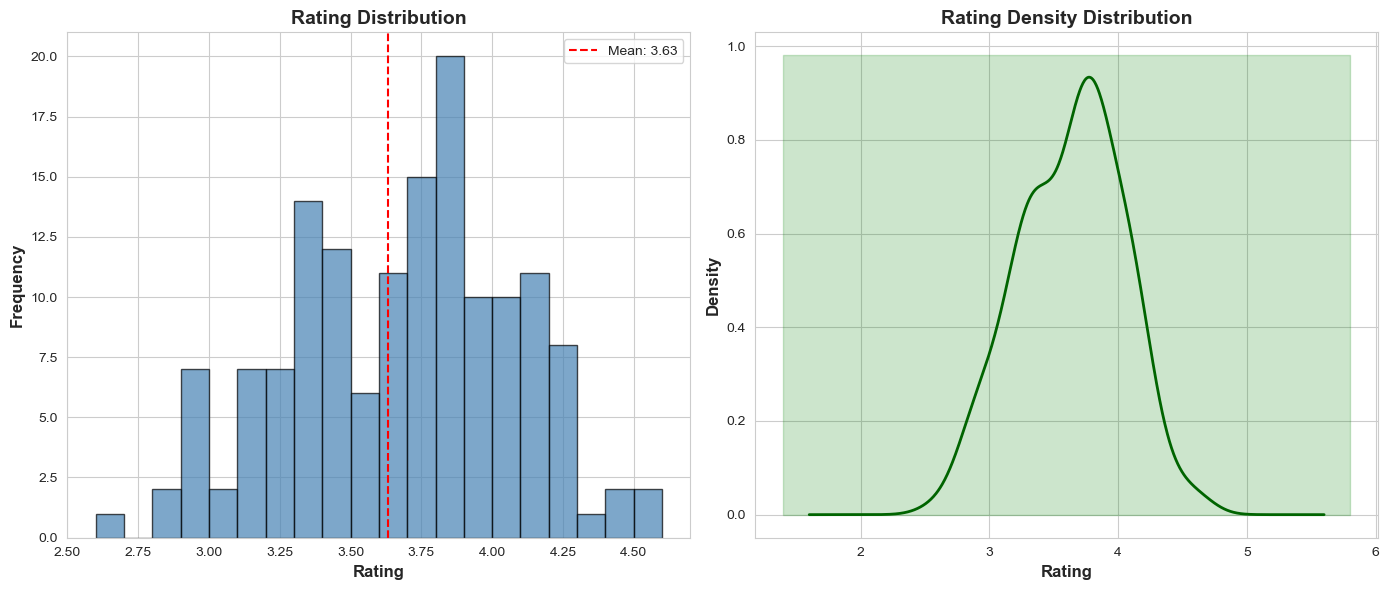

✓ Saved: ratings_analysis.png

Analyzing cost distribution...


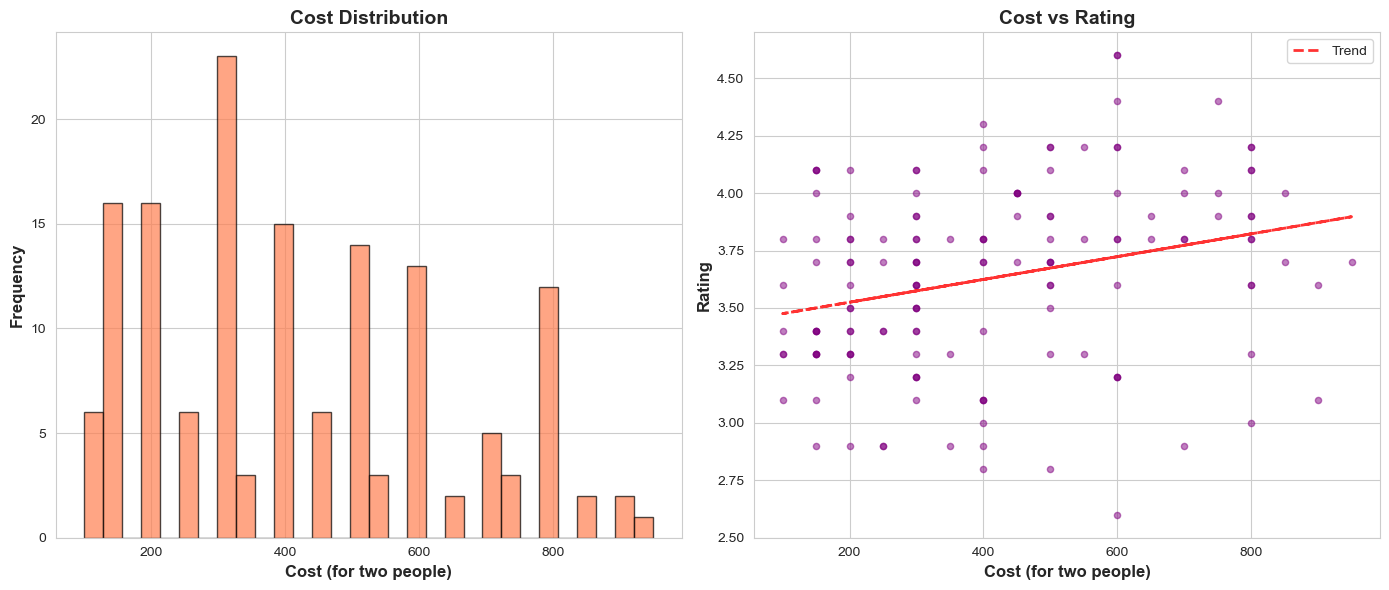

✓ Saved: cost_analysis.png

Creating correlation heatmap...


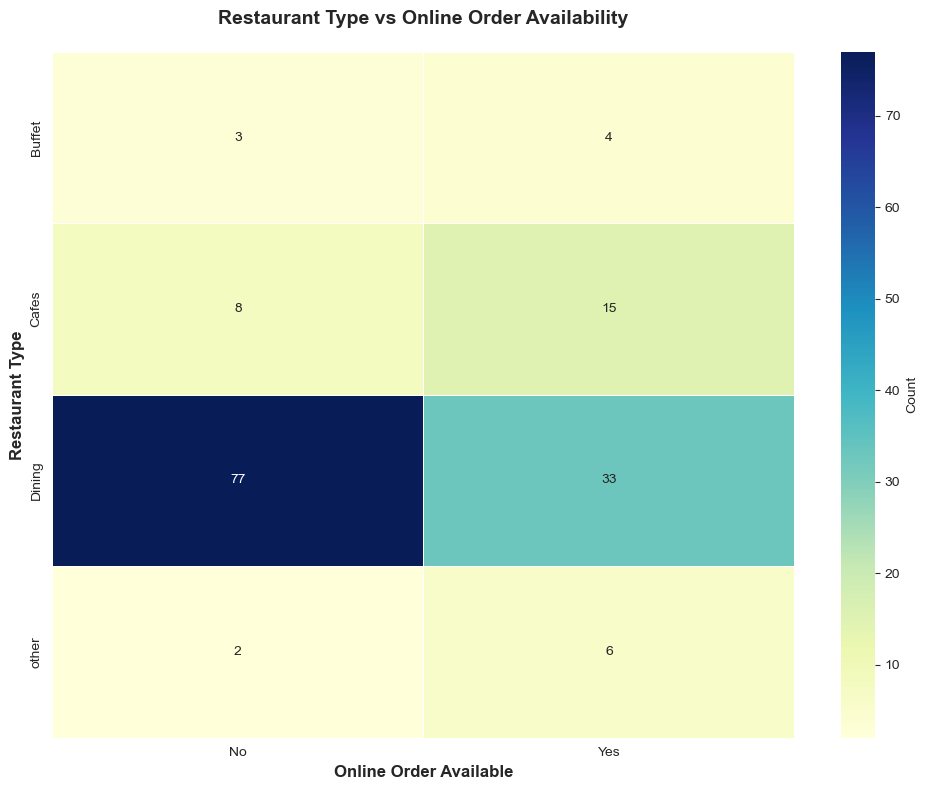

✓ Saved: correlation_heatmap.png


SUMMARY REPORT
Total Restaurants: 148
Average Rating: 3.63
Median Rating: 3.70
Total Votes: 39192
Online Order Available: 58
Dine-in Only: 90
Average Cost (for two): 418.24
Median Cost (for two): 400.00

✓ Saved: summary_report.csv

✅ Analysis complete! All visualizations saved to 'outputs' folder.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


class ZomatoAnalyzer:
    """
    A comprehensive analyzer for Zomato restaurant data.
    
    Attributes:
        dataframe (pd.DataFrame): The loaded and processed restaurant data
        output_dir (Path): Directory to save visualizations
    """
    
    def __init__(self, filepath, output_dir='outputs'):
        """
        Initialize the analyzer with data file.
        
        Args:
            filepath (str): Path to the CSV data file
            output_dir (str): Directory to save output visualizations
        """
        self.dataframe = None
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(exist_ok=True)
        self.load_data(filepath)
        
    def load_data(self, filepath):
        """Load and perform initial data processing."""
        try:
            self.dataframe = pd.read_csv(filepath)
            print("✓ Data loaded successfully!")
            print(f"  Shape: {self.dataframe.shape}")
            print(f"  Columns: {list(self.dataframe.columns)}\n")
        except FileNotFoundError:
            raise FileNotFoundError(f"Data file not found: {filepath}")
        except Exception as e:
            raise Exception(f"Error loading data: {str(e)}")
    
    def clean_data(self):
        """Clean and preprocess the data."""
        print("Cleaning data...")
        
        # Handle rate column
        if 'rate' in self.dataframe.columns:
            self.dataframe['rate'] = self.dataframe['rate'].apply(self._parse_rate)
        
        # Handle approximate cost
        if 'approx_cost(for two people)' in self.dataframe.columns:
            self.dataframe['approx_cost(for two people)'] = (
                self.dataframe['approx_cost(for two people)']
                .replace(',', '', regex=True)
                .astype(float, errors='ignore')
            )
        
        # Remove duplicates
        initial_rows = len(self.dataframe)
        self.dataframe.drop_duplicates(inplace=True)
        removed = initial_rows - len(self.dataframe)
        
        print(f"✓ Data cleaned!")
        print(f"  Removed {removed} duplicate rows")
        print(f"  Missing values:\n{self.dataframe.isnull().sum()}\n")
        
    @staticmethod
    def _parse_rate(value):
        """Parse rating value from string format."""
        try:
            if pd.isna(value) or value == 'NEW' or value == '-':
                return np.nan
            value_str = str(value).split('/')[0].strip()
            return float(value_str)
        except (ValueError, IndexError):
            return np.nan
    
    def explore_data(self):
        """Display basic data exploration statistics."""
        print("=" * 60)
        print("DATA EXPLORATION")
        print("=" * 60)
        
        print("\nFirst 5 rows:")
        print(self.dataframe.head())
        
        print("\n\nDataset Info:")
        self.dataframe.info()
        
        print("\n\nNumerical Statistics:")
        print(self.dataframe.describe())
        
        print("\n" + "=" * 60 + "\n")
    
    def analyze_restaurant_types(self):
        """Analyze and visualize restaurant types distribution."""
        print("Analyzing restaurant types...")
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Count plot
        type_col = 'listed_in(type)'
        if type_col in self.dataframe.columns:
            sns.countplot(data=self.dataframe, x=type_col, ax=axes[0], 
                         palette='Set2', order=self.dataframe[type_col].value_counts().index)
            axes[0].set_xlabel("Type of Restaurant", fontsize=12, fontweight='bold')
            axes[0].set_ylabel("Count", fontsize=12, fontweight='bold')
            axes[0].set_title("Restaurant Type Distribution", fontsize=14, fontweight='bold')
            axes[0].tick_params(axis='x', rotation=45)
            
            # Votes by type
            grouped_data = self.dataframe.groupby(type_col)['votes'].sum().sort_values(ascending=False)
            axes[1].plot(grouped_data.values, marker='o', linewidth=2, 
                        markersize=8, color='green')
            axes[1].set_xticks(range(len(grouped_data)))
            axes[1].set_xticklabels(grouped_data.index, rotation=45, ha='right')
            axes[1].set_xlabel("Type of Restaurant", fontsize=12, fontweight='bold')
            axes[1].set_ylabel("Total Votes", fontsize=12, fontweight='bold')
            axes[1].set_title("Total Votes by Restaurant Type", fontsize=14, fontweight='bold')
            axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(self.output_dir / 'restaurant_types_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"✓ Saved: restaurant_types_analysis.png\n")
    
    def find_top_restaurants(self, n=10):
        """Find and display top restaurants by votes."""
        print(f"Finding top {n} restaurants by votes...")
        
        top_restaurants = self.dataframe.nlargest(n, 'votes')[['name', 'votes', 'rate', 'listed_in(type)']]
        
        print("\nTop Restaurants by Votes:")
        print(top_restaurants.to_string(index=False))
        
        # Visualization
        plt.figure(figsize=(12, 6))
        top_data = self.dataframe.nlargest(n, 'votes')
        plt.barh(range(len(top_data)), top_data['votes'].values, color='skyblue', edgecolor='navy')
        plt.yticks(range(len(top_data)), top_data['name'].values)
        plt.xlabel('Votes', fontsize=12, fontweight='bold')
        plt.title(f'Top {n} Restaurants by Votes', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig(self.output_dir / 'top_restaurants.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"✓ Saved: top_restaurants.png\n")
    
    def analyze_online_orders(self):
        """Analyze online ordering patterns."""
        print("Analyzing online order patterns...")
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # Online order distribution
        if 'online_order' in self.dataframe.columns:
            order_counts = self.dataframe['online_order'].value_counts()
            axes[0].pie(order_counts.values, labels=order_counts.index, autopct='%1.1f%%',
                       startangle=90, colors=['#ff9999', '#66b3ff'])
            axes[0].set_title("Online Order Availability", fontsize=14, fontweight='bold')
            
            # Ratings by online order
            sns.boxplot(data=self.dataframe, x='online_order', y='rate', ax=axes[1],
                       palette='Set3')
            axes[1].set_xlabel("Online Order Available", fontsize=12, fontweight='bold')
            axes[1].set_ylabel("Rating", fontsize=12, fontweight='bold')
            axes[1].set_title("Rating Distribution by Online Order", fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(self.output_dir / 'online_order_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"✓ Saved: online_order_analysis.png\n")
    
    def analyze_ratings(self):
        """Analyze rating distributions."""
        print("Analyzing ratings distribution...")
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # Histogram
        axes[0].hist(self.dataframe['rate'].dropna(), bins=20, color='steelblue', 
                    edgecolor='black', alpha=0.7)
        axes[0].set_xlabel("Rating", fontsize=12, fontweight='bold')
        axes[0].set_ylabel("Frequency", fontsize=12, fontweight='bold')
        axes[0].set_title("Rating Distribution", fontsize=14, fontweight='bold')
        axes[0].axvline(self.dataframe['rate'].mean(), color='red', 
                       linestyle='--', label=f'Mean: {self.dataframe["rate"].mean():.2f}')
        axes[0].legend()
        
        # KDE plot
        self.dataframe['rate'].dropna().plot(kind='kde', ax=axes[1], color='darkgreen', linewidth=2)
        axes[1].set_xlabel("Rating", fontsize=12, fontweight='bold')
        axes[1].set_ylabel("Density", fontsize=12, fontweight='bold')
        axes[1].set_title("Rating Density Distribution", fontsize=14, fontweight='bold')
        axes[1].fill_between(axes[1].get_xlim(), 0, axes[1].get_ylim()[1], alpha=0.2, color='green')
        
        plt.tight_layout()
        plt.savefig(self.output_dir / 'ratings_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"✓ Saved: ratings_analysis.png\n")
    
    def analyze_cost(self):
        """Analyze approximate cost for two people."""
        print("Analyzing cost distribution...")
        
        cost_col = 'approx_cost(for two people)'
        if cost_col in self.dataframe.columns:
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))
            
            # Cost distribution
            cost_data = pd.to_numeric(self.dataframe[cost_col], errors='coerce').dropna()
            axes[0].hist(cost_data, bins=30, color='coral', edgecolor='black', alpha=0.7)
            axes[0].set_xlabel("Cost (for two people)", fontsize=12, fontweight='bold')
            axes[0].set_ylabel("Frequency", fontsize=12, fontweight='bold')
            axes[0].set_title("Cost Distribution", fontsize=14, fontweight='bold')
            
            # Cost vs Rating
            valid_data = self.dataframe[[cost_col, 'rate']].dropna()
            valid_data[cost_col] = pd.to_numeric(valid_data[cost_col], errors='coerce')
            valid_data = valid_data.dropna()
            
            axes[1].scatter(valid_data[cost_col], valid_data['rate'], 
                          alpha=0.5, color='purple', s=20)
            axes[1].set_xlabel("Cost (for two people)", fontsize=12, fontweight='bold')
            axes[1].set_ylabel("Rating", fontsize=12, fontweight='bold')
            axes[1].set_title("Cost vs Rating", fontsize=14, fontweight='bold')
            
            # Add trend line
            z = np.polyfit(valid_data[cost_col], valid_data['rate'], 1)
            p = np.poly1d(z)
            axes[1].plot(valid_data[cost_col], p(valid_data[cost_col]), 
                        "r--", alpha=0.8, linewidth=2, label='Trend')
            axes[1].legend()
            
            plt.tight_layout()
            plt.savefig(self.output_dir / 'cost_analysis.png', dpi=300, bbox_inches='tight')
            plt.show()
            
            print(f"✓ Saved: cost_analysis.png\n")
    
    def create_correlation_heatmap(self):
        """Create heatmap showing relationships between categorical variables."""
        print("Creating correlation heatmap...")
        
        type_col = 'listed_in(type)'
        order_col = 'online_order'
        
        if type_col in self.dataframe.columns and order_col in self.dataframe.columns:
            pivot_table = self.dataframe.pivot_table(
                index=type_col, 
                columns=order_col, 
                aggfunc='size', 
                fill_value=0
            )
            
            plt.figure(figsize=(10, 8))
            sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', 
                       linewidths=0.5, cbar_kws={'label': 'Count'})
            plt.title('Restaurant Type vs Online Order Availability', 
                     fontsize=14, fontweight='bold', pad=20)
            plt.xlabel('Online Order Available', fontsize=12, fontweight='bold')
            plt.ylabel('Restaurant Type', fontsize=12, fontweight='bold')
            plt.tight_layout()
            plt.savefig(self.output_dir / 'correlation_heatmap.png', dpi=300, bbox_inches='tight')
            plt.show()
            
            print(f"✓ Saved: correlation_heatmap.png\n")
    
    def generate_summary_report(self):
        """Generate a comprehensive summary report."""
        print("\n" + "=" * 60)
        print("SUMMARY REPORT")
        print("=" * 60)
        
        report = {
            'Total Restaurants': len(self.dataframe),
            'Average Rating': self.dataframe['rate'].mean(),
            'Median Rating': self.dataframe['rate'].median(),
            'Total Votes': self.dataframe['votes'].sum(),
            'Online Order Available': 
                self.dataframe['online_order'].value_counts().get('Yes', 0),
            'Dine-in Only': 
                self.dataframe['online_order'].value_counts().get('No', 0)
        }
        
        cost_col = 'approx_cost(for two people)'
        if cost_col in self.dataframe.columns:
            cost_data = pd.to_numeric(self.dataframe[cost_col], errors='coerce')
            report['Average Cost (for two)'] = cost_data.mean()
            report['Median Cost (for two)'] = cost_data.median()
        
        for key, value in report.items():
            if isinstance(value, float):
                print(f"{key}: {value:.2f}")
            else:
                print(f"{key}: {value}")
        
        print("=" * 60 + "\n")
        
        # Save report
        report_df = pd.DataFrame([report])
        report_df.to_csv(self.output_dir / 'summary_report.csv', index=False)
        print(f"✓ Saved: summary_report.csv\n")
    
    def run_complete_analysis(self):
        """Run all analysis steps in sequence."""
        print("\n🚀 Starting Complete Zomato Data Analysis\n")
        
        self.clean_data()
        self.explore_data()
        self.analyze_restaurant_types()
        self.find_top_restaurants()
        self.analyze_online_orders()
        self.analyze_ratings()
        self.analyze_cost()
        self.create_correlation_heatmap()
        self.generate_summary_report()
        
        print("✅ Analysis complete! All visualizations saved to 'outputs' folder.\n")


def main():
    """Main execution function."""
    # Update this path to your data file location
    DATA_FILE = "Zomato-data-.csv"
    
    try:
        # Initialize analyzer
        analyzer = ZomatoAnalyzer(DATA_FILE)
        
        # Run complete analysis
        analyzer.run_complete_analysis()
        
    except FileNotFoundError as e:
        print(f"❌ Error: {e}")
        print("Please ensure the data file is in the correct location.")
    except Exception as e:
        print(f"❌ An error occurred: {e}")


if __name__ == "__main__":
    main()